In [ ]:
#Social_Networks_Ads.csv

**Importing the libraries**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.preprocessing import StandardScaler #import standardscaler for feature scaling
from sklearn.metrics import confusion_matrix # import confusion matrix for validation
from sklearn.metrics import precision_score 
from sklearn.metrics import f1_score
from sklearn import metrics

**Importing the dataset**

In [3]:
df=pd.read_csv("C:/Users/lenovo/Downloads/Social_Network_Ads.csv")

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


**Splitting the dataset into the Training set and Test set**

In [5]:
X = df.iloc[:, [2, 3]].values
y = df.iloc[:, 4].values

In [6]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=1)

**Feature Scaling**

In [7]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Fitting K-NN to the Training set**

In [11]:
#Fitting classifier to the Training set
Kn = KNeighborsClassifier(n_neighbors=5 , metric='minkowski' , p=2)
Kn.fit(X_train,Y_train)

KNeighborsClassifier()

**Predicting the Test set results**

In [13]:
#Predicting the Test set results
y_pred = Kn.predict(X_test)

In [14]:
#Accuracy Score
accuracy=Kn.score(X_test,Y_test)
print(accuracy)

0.8625


**Making the Confusion Matrix**

In [15]:
cfn_mtrx=confusion_matrix(Y_test,y_pred)
print(cfn_mtrx)

[[40  8]
 [ 3 29]]


In [17]:
# Precision,Recall and F1-score 
print("Precision : ", metrics.precision_score(Y_test, y_pred))
print("Recall score : ",metrics.recall_score(Y_test, y_pred))
print("F1 score : ", f1_score(Y_test,y_pred))

Precision :  0.7837837837837838
Recall score :  0.90625
F1 score :  0.8405797101449275


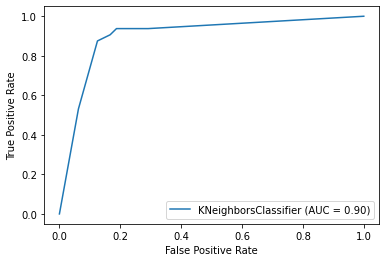

In [24]:
## AUROC
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, confusion_matrix, f1_score
plot_roc_curve(Kn, X_test, Y_test)

In [22]:
roc_auc_score(Y_test, Kn.predict_proba(X_test)[:,1])

0.9007161458333333